# Практическая 3
Вариант 9
Движение тела, брошенного под углом к горизонту

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [ ]:
def euler_cauchy_system(x0, y0, vx0, vy0, T0, tau, k1, k2, m):
    result = np.zeros((5, 1))
    result[0, 0] = T0    # Узлы сетки
    result[1, 0] = x0    # Значения x
    result[2, 0] = y0    # Значения y
    result[3, 0] = vx0   # Значения vx
    result[4, 0] = vy0   # Значения vy

    t_prev = T0
    x_prev = x0
    y_prev = y0
    vx_prev = vx0
    vy_prev = vy0

    while y_prev > 0 or x_prev == x0:
        vx_pred = vx_prev - tau * ((k1 + k2 * np.hypot(vx_prev, vy_prev)) / m) * vx_prev
        vy_pred = vy_prev - tau * (9.806 + ((k1 + k2 * np.hypot(vx_prev, vy_prev)) / m) * vy_prev)
        x_pred = x_prev + tau * vx_prev
        y_pred = y_prev + tau * vy_prev

        f1_prev = -((k1 + k2 * np.hypot(vx_prev, vy_prev)) / m) * vx_prev
        f1_pred = -((k1 + k2 * np.hypot(vx_pred, vy_pred)) / m) * vx_pred
        f2_prev = -9.806 - ((k1 + k2 * np.hypot(vx_prev, vy_prev)) / m) * vy_prev
        f2_pred = -9.806 - ((k1 + k2 * np.hypot(vx_pred, vy_pred)) / m) * vy_pred

        vx = vx_prev + tau * 0.5 * (f1_prev + f1_pred)
        vy = vy_prev + tau * 0.5 * (f2_prev + f2_pred)
        x = x_prev + tau * 0.5 * (vx_prev + vx)
        y = y_prev + tau * 0.5 * (vy_prev + vy)

        result = np.append(result, [[t_prev+tau], [x], [y], [vx], [vy]], axis=1)

        t_prev, x_prev, y_prev, vx_prev, vy_prev = t_prev+tau, x, y, vx, vy

    return result

# Задание 1
Получить траектории движения тела для четырех вариантов
1. без учета сопротивления
2. при учете линейной составляющей
3. при учете квадратичной составляющей
4. при учете обеих составляющих

In [ ]:
r = 0.2
v0 = 40
alpha = 25 / 180 * np.pi
p = 7800
m = (4/3) * np.pi * r ** 3 * p
p_air = 1.29
mu = 1.002
S = np.pi * r ** 2
tau = 0.002
c = 0.47
T0 = 0
x0 = 0
y0 = 0
vx0 = v0 * np.cos(alpha)
vy0 = v0 * np.sin(alpha)

In [ ]:
def x(t, x0, v0, alpha):
    return x0 + v0 * np.cos(alpha) * t

def y(t, y0, v0, alpha):
    return y0 + v0 * t * np.sin(alpha) - 9.806 * t ** 2 / 2

In [ ]:
k1 = 0
k2 = 0

t = np.linspace(0, 2 * v0*np.sin(alpha) / 9.806, 500)
exact_x = [x(ti, x0, v0, alpha) for ti in t]
exact_y = [y(ti, y0, v0, alpha) for ti in t]

print(max(exact_y), "Высшая точка траектории(точное решение)")

14.571117916839047 Высшая точка траектории(точное решение)


In [ ]:
k1 = 6 * np.pi * mu * r
k2 = 0

t, x_l, y_l, vx, vy = euler_cauchy_system(x0, y0, vx0, vy0, T0, tau, k1, k2, m)

print(max(y_l), "Высшая точка траектории(только лин. сост.)")

14.333590613480812 Высшая точка траектории(только лин. сост.)


In [ ]:
k1 = 0
k2 = c * S * p_air / 2

t, x_k, y_k, vx, vy = euler_cauchy_system(x0, y0, vx0, vy0, T0, tau, k1, k2, m)

print(max(y_k), "Высшая точка траектории(только кв. сост.)")

14.478019130110322 Высшая точка траектории(только кв. сост.)


In [ ]:
k1 = 6 * np.pi * mu * r
k2 = c * S * p_air / 2

t, x_lk, y_lk, vx, vy = euler_cauchy_system(x0, y0, vx0, vy0, T0, tau, k1, k2, m)

print(max(y_lk), "Высшая точка траектории(лин. и кв. сост.)")

14.244306182410641 Высшая точка траектории(лин. и кв. сост.)


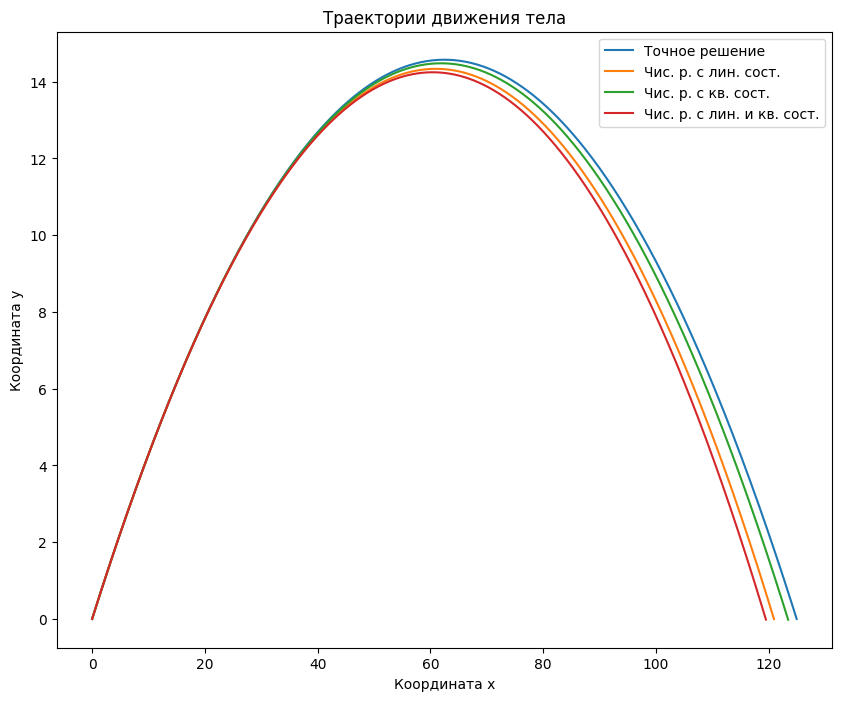

In [ ]:
fig = plt.figure(figsize=(10, 8))

plt.plot(exact_x, exact_y, label="Точное решение")
plt.plot(x_l, y_l, label="Чис. р. с лин. сост.")
plt.plot(x_k, y_k, label="Чис. р. с кв. сост.")
plt.plot(x_lk, y_lk, label="Чис. р. с лин. и кв. сост.")

plt.title("Траектории движения тела")
plt.xlabel("Координата x")
plt.ylabel("Координата y")
plt.legend()

plt.show()

# Задание 2
Найти траекторию снаряда поражающего цель(найти угол) на расстоянии l

In [ ]:
r = 0.2
v0 = 40
step = 1
p = 7800
m = (4/3) * np.pi * r ** 3 * p
p_air = 1.29
mu = 1.002
S = np.pi * r ** 2
c = 0.47
tau = 0.002
T0 = 0
x0 = 0
y0 = 0
l = 200

# Аналитическое решение без учета сопротивления

$$L=\frac{v_0^2sin^2(\alpha_0)}{2g}$$
$$sin(\alpha_0)=\sqrt{\frac{2gl}{v_0^2}}$$
$$\alpha_0=arcsin\sqrt{\frac{2gl}{v_0^2}}$$


# Численное решение

In [ ]:
alpha = step
alpha_l, x_l, y_l = 90, np.empty(0), np.empty(0)
alpha_k, x_k, y_k = 90, np.empty(0), np.empty(0)
alpha_lk, x_lk, y_lk = 90, np.empty(0), np.empty(0)

In [ ]:
k1 = 6 * np.pi * mu * r
k2 = 0

alpha = step

while alpha < 90:
    vy0 = v0 * np.sin(alpha / 180 * np.pi)
    vx0 = v0 * np.sin(alpha / 180 * np.pi)

    t, x, y, vx, vy = euler_cauchy_system(x0, y0, vx0, vy0, T0, tau, k1, k2, m)
    if x[-1] >= l:
        alpha_l = alpha
        x_l, y_l = x, y
        break

    alpha += step

print("Необходиый угол", alpha_l)

Необходиый угол 54


In [ ]:
k1 = 0
k2 = c * S * p_air / 2

alpha = step

while alpha < 90:
    vy0 = v0 * np.sin(alpha / 180 * np.pi)
    vx0 = v0 * np.sin(alpha / 180 * np.pi)

    t, x, y, vx, vy = euler_cauchy_system(x0, y0, vx0, vy0, T0, tau, k1, k2, m)
    if x[-1] >= l:
        alpha_k = alpha
        x_k, y_k = x, y
        break

    alpha += step

print("Необходиый угол", alpha_k)

Необходиый угол 53


In [ ]:
k1 = 6 * np.pi * mu * r
k2 = c * S * p_air / 2

alpha = step

while alpha < 90:
    vy0 = v0 * np.sin(alpha / 180 * np.pi)
    vx0 = v0 * np.sin(alpha / 180 * np.pi)

    t, x, y, vx, vy = euler_cauchy_system(x0, y0, vx0, vy0, T0, tau, k1, k2, m)
    if x[-1] >= l:
        alpha_lk = alpha
        x_lk, y_lk = x, y
        break

    alpha += step

print("Необходиый угол", alpha_lk)

Необходиый угол 55


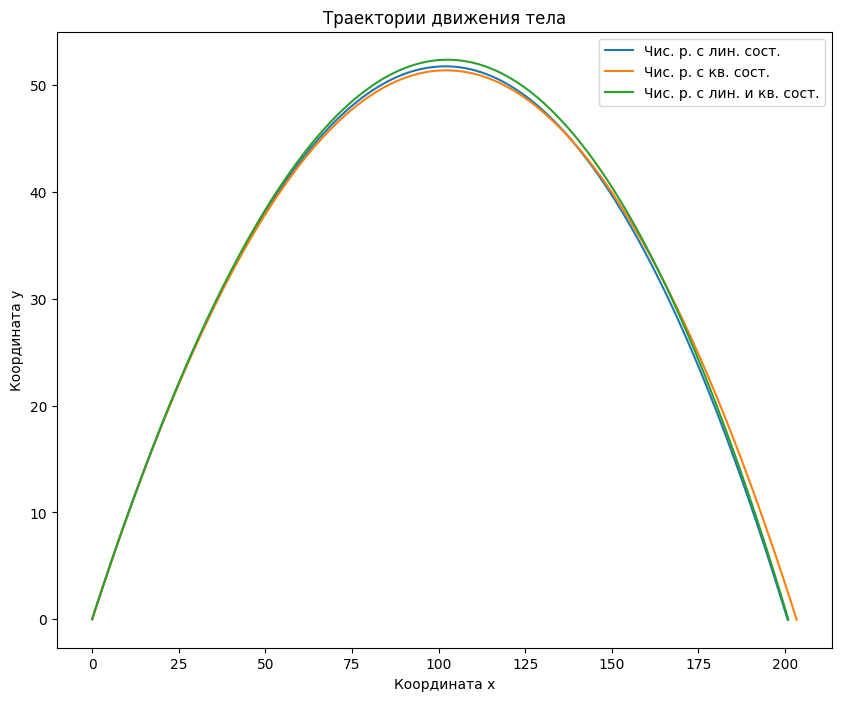

In [ ]:
fig = plt.figure(figsize=(10, 8))

plt.plot(x_l, y_l, label="Чис. р. с лин. сост.")
plt.plot(x_k, y_k, label="Чис. р. с кв. сост.")
plt.plot(x_lk, y_lk, label="Чис. р. с лин. и кв. сост.")

plt.title("Траектории движения тела")
plt.xlabel("Координата x")
plt.ylabel("Координата y")
plt.legend()

plt.show()

# Задание 3
Построить график зависимости необходимого угла от начальной скорости

In [ ]:
M = 20
delta_v = 5
v0 = 20

In [ ]:
k1 = 6 * np.pi * mu * r
k2 = 0

res_l = np.zeros((2, M))

for i in range(M):
    v0_i = v0 + i * delta_v
    alpha = step
    while alpha < 90:
        vy0 = v0_i * np.sin(alpha / 180 * np.pi)
        vx0 = v0_i * np.sin(alpha / 180 * np.pi)

        t, x, y, vx, vy = euler_cauchy_system(x0, y0, vx0, vy0, T0, tau, k1, k2, m)

        if x[-1] >= l:
            break

        alpha += 1

    res_l[0, i] = v0_i
    res_l[1, i] = alpha

# C учетом квадратичной составляющей

In [ ]:
k1 = 0
k2 = c * S * p_air / 2

res_k = np.zeros((2, M))

for i in range(M):
    v0_i = v0 + i * delta_v
    alpha = step
    while alpha < 90:
        vy0 = v0_i * np.sin(alpha / 180 * np.pi)
        vx0 = v0_i * np.sin(alpha / 180 * np.pi)

        t, x, y, vx, vy = euler_cauchy_system(x0, y0, vx0, vy0, T0, tau, k1, k2, m)

        if x[-1] >= l:
            break

        alpha += 1
    res_k[0, i] = v0_i
    res_k[1, i] = alpha

# C учетом линейной и квадратичной составляющей

In [ ]:
k1 = 6 * np.pi * mu * r
k2 = c * S * p_air / 2

res_lk = np.zeros((2, M))

for i in range(M):
    v0_i = v0 + i * delta_v
    alpha = step
    while alpha < 90:
        vy0 = v0_i * np.sin(alpha / 180 * np.pi)
        vx0 = v0_i * np.sin(alpha / 180 * np.pi)

        t, x, y, vx, vy = euler_cauchy_system(x0, y0, vx0, vy0, T0, tau, k1, k2, m)

        if x[-1] >= l:
            break

        alpha += 1

    res_lk[0, i] = v0_i
    res_lk[1, i] = alpha

In [ ]:
print(res_k)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


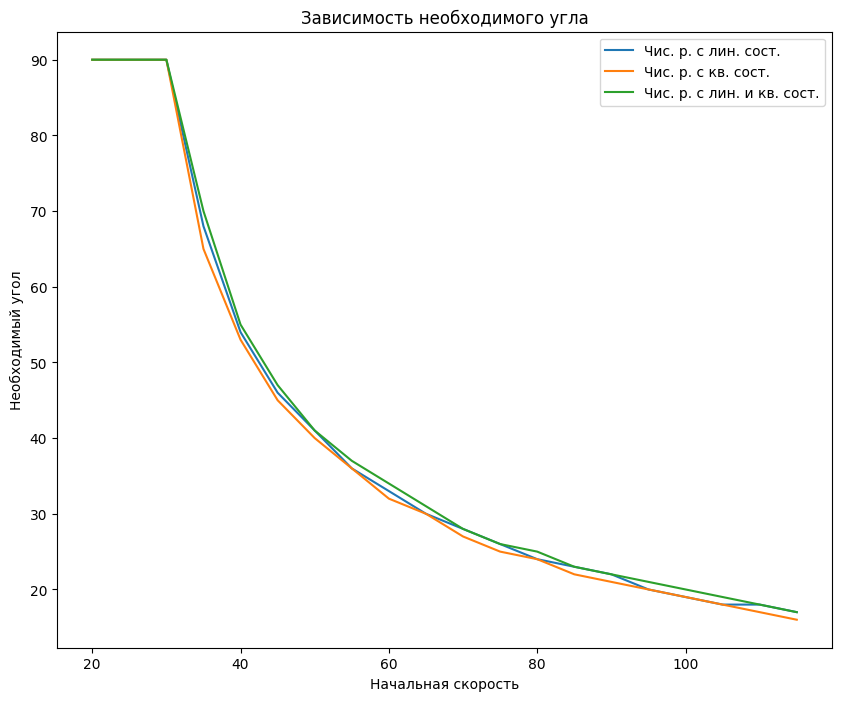

In [ ]:
fig = plt.figure(figsize=(10, 8))

plt.plot(res_l[0], res_l[1], label="Чис. р. с лин. сост.")
plt.plot(res_k[0], res_k[1], label="Чис. р. с кв. сост.")
plt.plot(res_lk[0], res_lk[1], label="Чис. р. с лин. и кв. сост.")

plt.title("Зависимость необходимого угла")
plt.xlabel("Начальная скорость")
plt.ylabel("Необходимый угол")
plt.legend()

plt.show()